In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
from js import fetch
import io

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(boston_url)
boston = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_url_df = pd.read_csv(boston)

In [6]:
boston_url_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


For the "Median value of owner-occupied homes" provide a boxplot

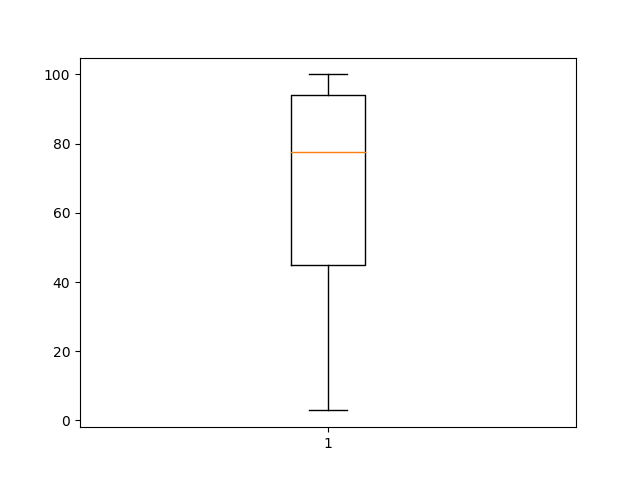

In [7]:
plt.boxplot(boston_url_df['AGE'])
plt.show()

Finding: The median of owner-occupied homes is at 78% to 79%, this means Boston has mode home owners then renters.

Provide a  bar plot for the Charles river variable

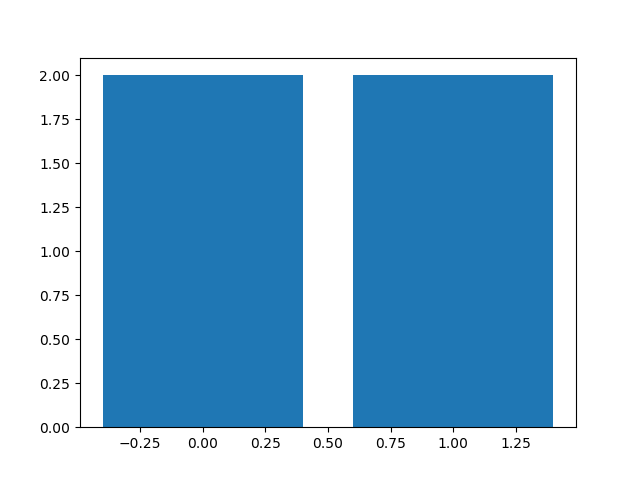

In [9]:
plt.bar(boston_url_df['CHAS'],height = 2)
plt.show()

Finding: This tract bounds river so 1.

In [ ]:
Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

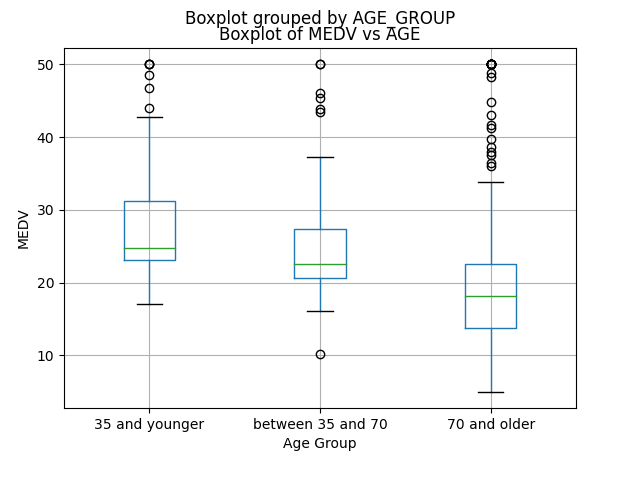

In [13]:
boston_url_df['AGE_GROUP'] = pd.cut(boston_url_df['AGE'], [0, 35, 70, 100], labels=['35 and younger', 'between 35 and 70', '70 and older'])
boston_url_df['AGE_GROUP'] = pd.Categorical(boston_url_df['AGE_GROUP'])

boston_url_df.boxplot(column='MEDV', by='AGE_GROUP')
plt.title('Boxplot of MEDV vs AGE')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.show()


Finding: The MEDV for age group 35 and yonger is marginally higer than betwen 35 and 70 age group and a material diffrece in vaule as comapred to 70 and older. With increase in age the MEDV is reducing.

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

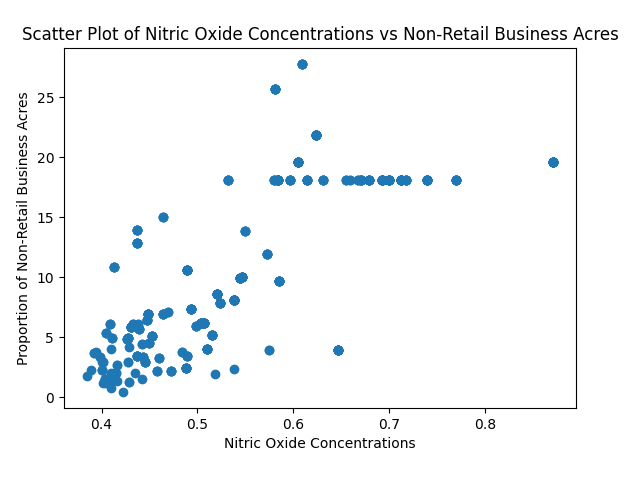

In [14]:
plt.scatter(boston_url_df['NOX'], boston_url_df['INDUS'])
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

Finding:The study concolueds that the concentradtion of Nitric Oxide increases with the increase in proportion of Non- retail business. This is a good thing as people visiting reatils business are not highly exposed to Nitrcit oxide concentration.

Create a histogram for the pupil to teacher ratio variable

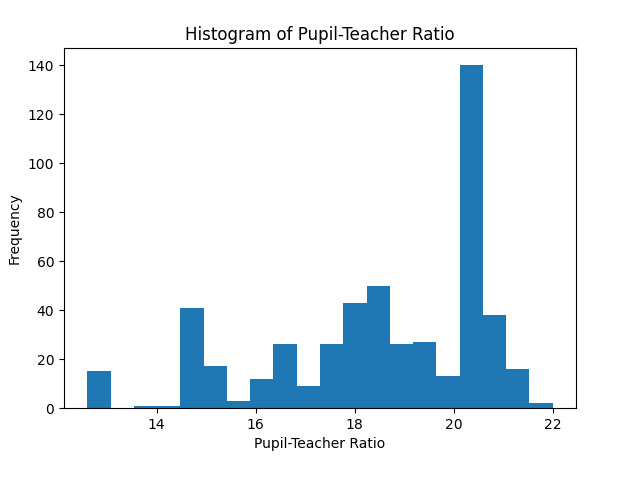

In [17]:
plt.hist(boston_url_df['PTRATIO'], bins=20)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

Finding:the Pupil-Teacher ration is highest around 20-22 as it has mazimum frequesnency, howere this ration is not distributed evenly, which means in some towns there are nore teacher then required and in some towns there are less teachers then required. Hence, this sould be revisited and should be spreaed across the town based on the capacity.

Task 5: Use the appropriate tests to answer the questions provided.

1. Hypothesis: The median value of houses bounded by the Charles river is significantly different from the median value of houses not bounded by the Charles river.
- H0: The median value of houses bounded by the Charles river is equal to the median value of houses not bounded by the Charles river.
- HA: The median value of houses bounded by the Charles river is not equal to the median value of houses not bounded by the Charles river.
- Test: Two-sample t-test for independent samples
- Conclusion: Based on the p-value obtained from the t-test, if it is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in median value of houses bounded by the Charles river or not.

2. Hypothesis: The median value of houses (MEDV) is different for each proportion of owner-occupied units built prior to 1940 (AGE).
- H0: The median value of houses is the same for all the age groups.
- HA: The median value of houses is different for at least one age group.
- Test: One-way ANOVA
- Conclusion: Based on the p-value obtained from the ANOVA test, if it is less than 0.05, we reject the null hypothesis and conclude that there is a difference in median value of houses for each proportion of owner-occupied units built prior to 1940.

3. Hypothesis: There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
- H0: There is no correlation between the two variables.
- HA: There is a correlation between the two variables.
- Test: Pearson correlation test
- Conclusion: Based on the p-value obtained from the correlation test, if it is less than 0.05, we reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


4. Hypothesis: An additional weighted distance to the five Boston employment centers has no impact on the median value of owner-occupied homes.
- H0: The weight of the distance to the five Boston employment centers has no effect on the median value of owner-occupied homes.
- HA: The weight of the distance to the five Boston employment centers has an effect on the median value of owner-occupied homes.
- Test: Multiple linear regression with the Weighted Distance variable as the independent variable and Median Value of Owner Occupied Homes as the dependent variable.
- Conclusion: Based on the p-value obtained from the regression analysis, if it is less than 0.05, we reject the null hypothesis and conclude that an additional weighted distance to the five Boston employment centers has an impact on the median value of owner-occupied homes